In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
# Any results you write to the current directory are saved as output.

In [176]:
#Author Jeong, Soyeon, kt01067774539@gmail.com
#Supervisor Na, In Seop, ypencil@hanmail.net
#Starting 2019.01.04
import numpy as np
import pandas as pd

train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [177]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [178]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [179]:
train.shape

(891, 12)

In [180]:
test.shape

(418, 11)

In [181]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [182]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [183]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [184]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

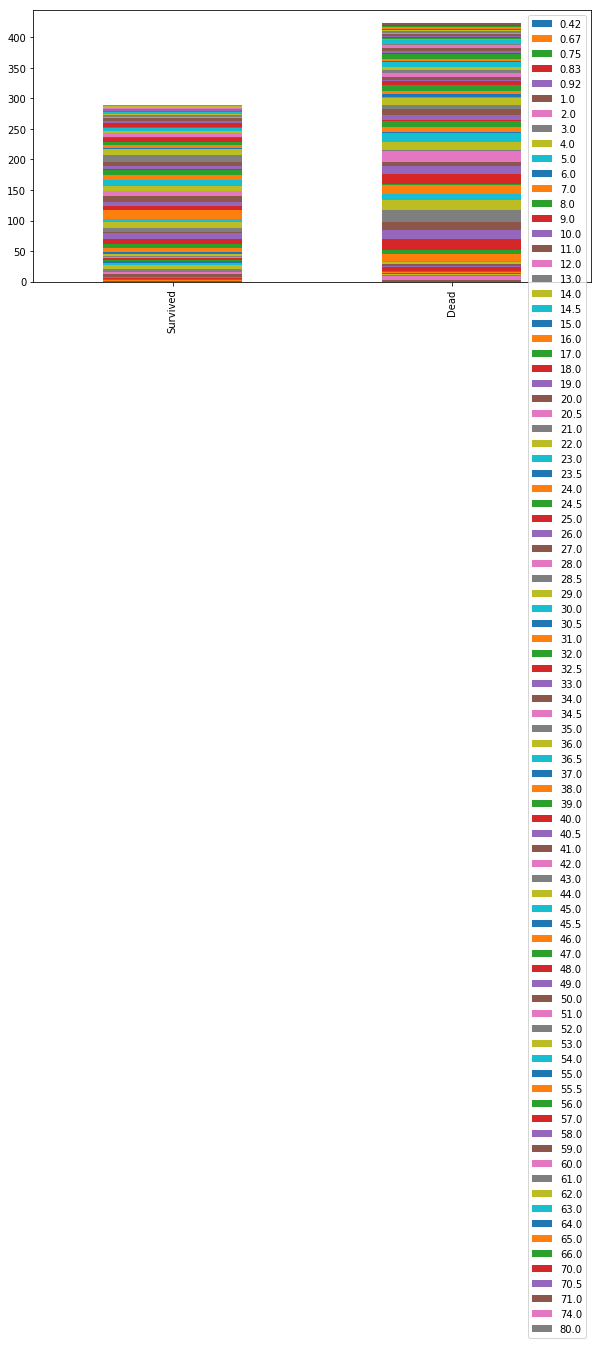

In [187]:
bar_chart('Age')

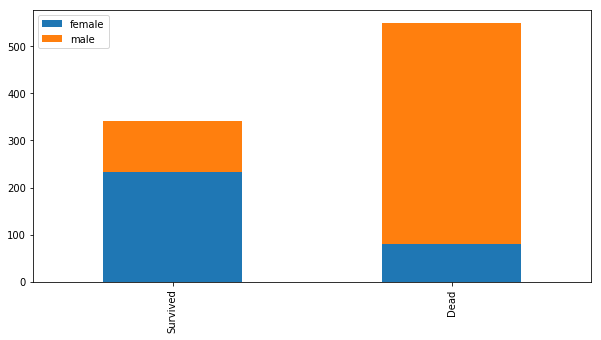

In [188]:
bar_chart('Sex')

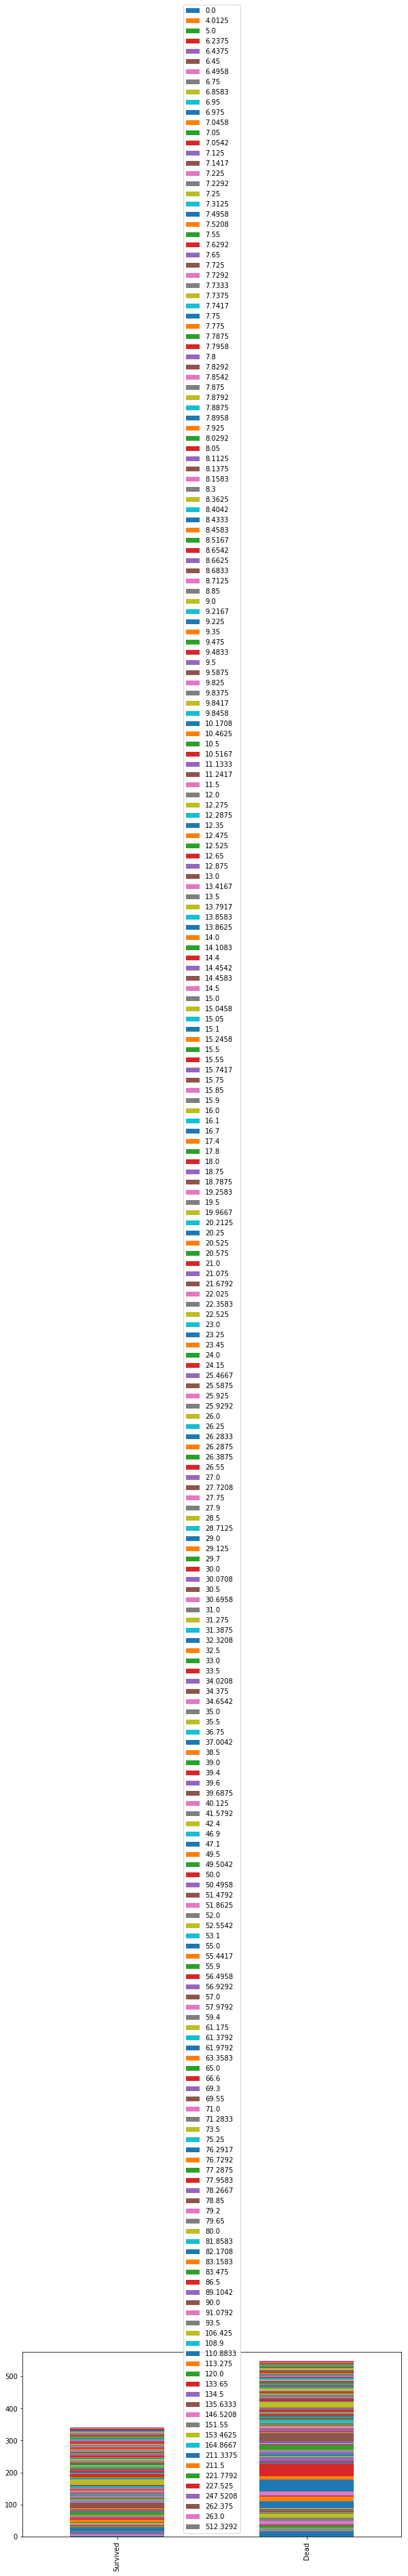

In [189]:
bar_chart('Fare')

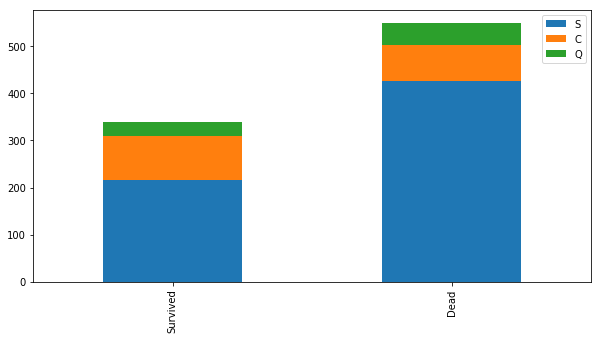

In [190]:
bar_chart('Embarked')

In [191]:
total_data = [train, test]

In [192]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [193]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [194]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [195]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S


In [196]:
sex_mapping = {"male": 0, "female": 1}
for dataset in total_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

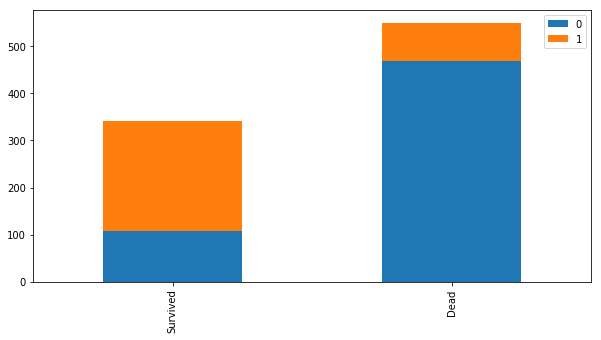

In [197]:
bar_chart('Sex')

In [198]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S


In [199]:
train["Age"].fillna(train.groupby("Sex")["Age"].transform("median"), inplace=True)

In [200]:
test["Age"].fillna(train.groupby("Sex")["Age"].transform("median"), inplace=True)

In [201]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S


In [202]:
train.head(30)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,0,29.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


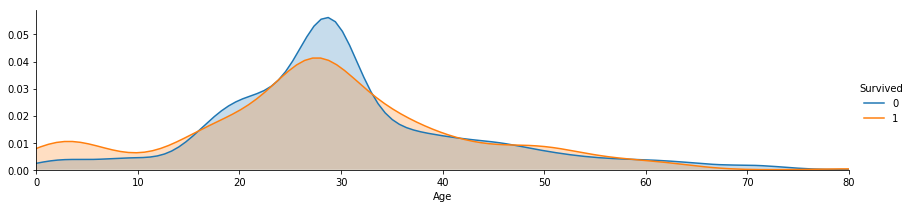

In [203]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 20)

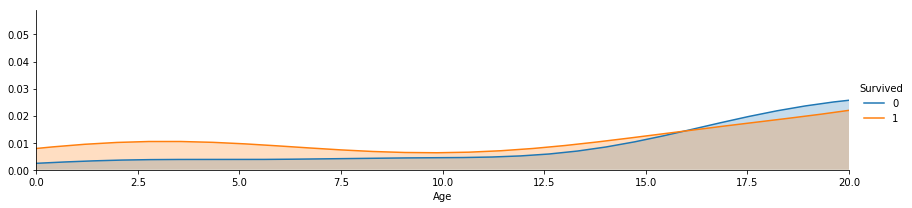

In [204]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(20, 30)

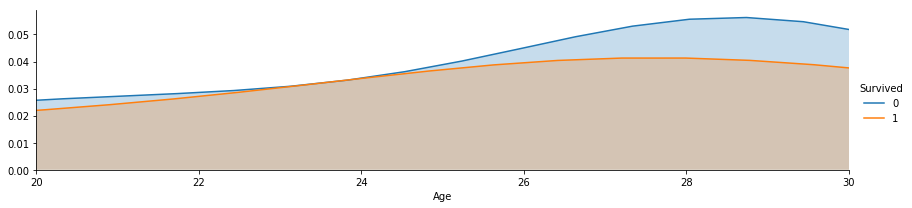

In [205]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(30, 40)

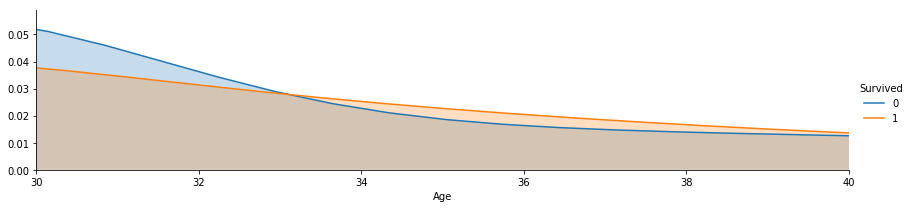

In [206]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(40, 60)

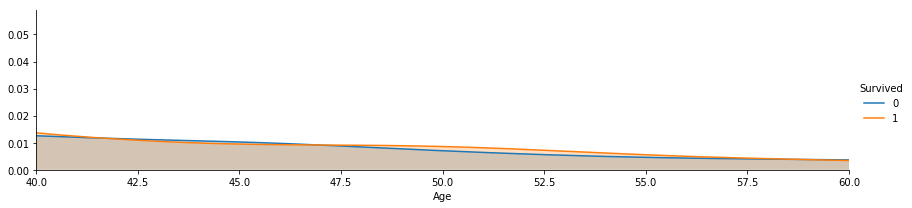

In [207]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(40, 60)

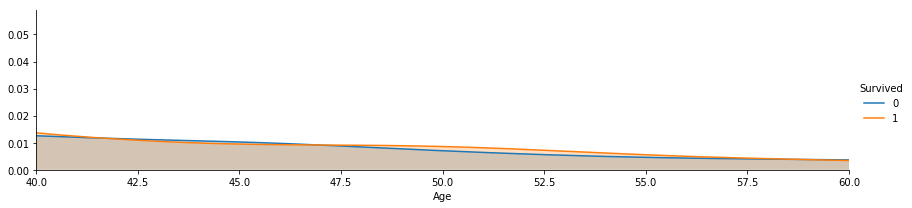

In [208]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

In [209]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(3)
memory usage: 76.6+ KB


In [210]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 32.7+ KB


In [211]:
for dataset in total_data:
    dataset.loc[ dataset['Age'] <= 13, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 13) & (dataset['Age'] <= 20), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 30), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age'] = 3,
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 50), 'Age'] = 4,
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 60), 'Age'] = 5,
    dataset.loc[ dataset['Age'] > 60, 'Age'] = 6

In [212]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,2.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,3.0,1,0,113803,53.1000,C123,S
4,5,0,3,0,3.0,0,0,373450,8.0500,NaN,S


In [213]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,0,3.0,0,0,330911,7.8292,NaN,Q
1,893,3,1,4.0,1,0,363272,7.0000,NaN,S
2,894,2,0,6.0,0,0,240276,9.6875,NaN,Q
3,895,3,0,2.0,0,0,315154,8.6625,NaN,S
4,896,3,1,2.0,1,1,3101298,12.2875,NaN,S


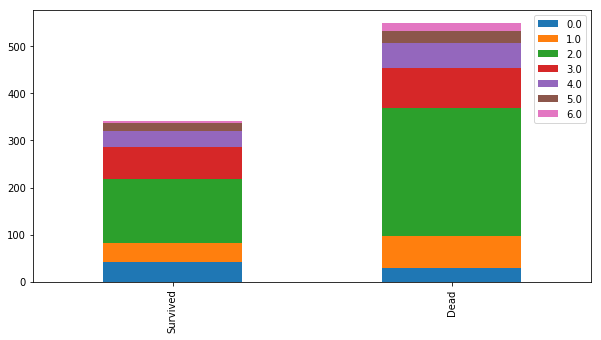

In [214]:
bar_chart('Age')

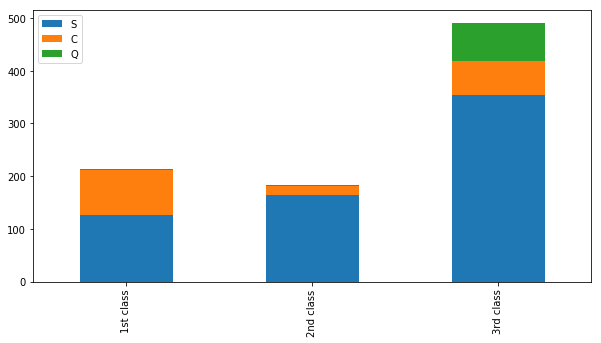

In [215]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [216]:
for dataset in total_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [217]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,0,3.0,0,0,330911,7.8292,NaN,Q
1,893,3,1,4.0,1,0,363272,7.0000,NaN,S
2,894,2,0,6.0,0,0,240276,9.6875,NaN,Q
3,895,3,0,2.0,0,0,315154,8.6625,NaN,S
4,896,3,1,2.0,1,1,3101298,12.2875,NaN,S


In [218]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,2.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,3.0,1,0,113803,53.1000,C123,S
4,5,0,3,0,3.0,0,0,373450,8.0500,NaN,S


In [219]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in total_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [220]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(30)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,2.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,1,3.0,1,0,113803,53.1000,C123,0
4,5,0,3,0,3.0,0,0,373450,8.0500,NaN,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2
6,7,0,1,0,5.0,0,0,17463,51.8625,E46,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0
9,10,1,2,1,1.0,1,0,237736,30.0708,NaN,1


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


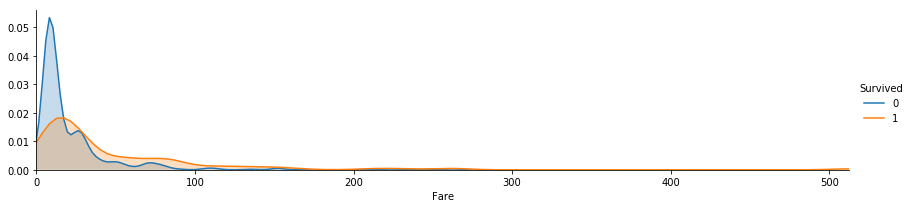

In [221]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 20)

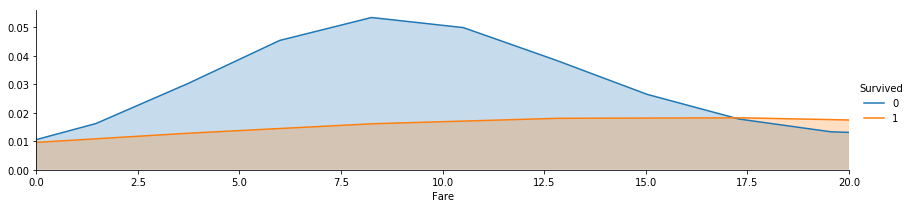

In [222]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 30)

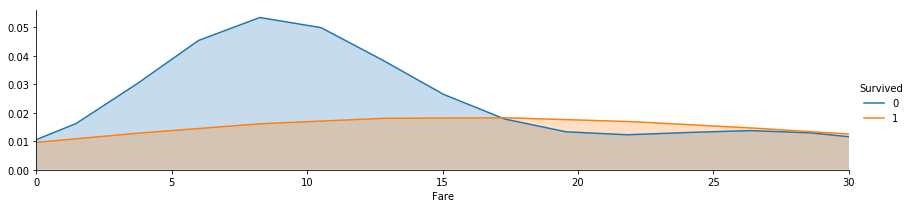

In [223]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 512.3292)

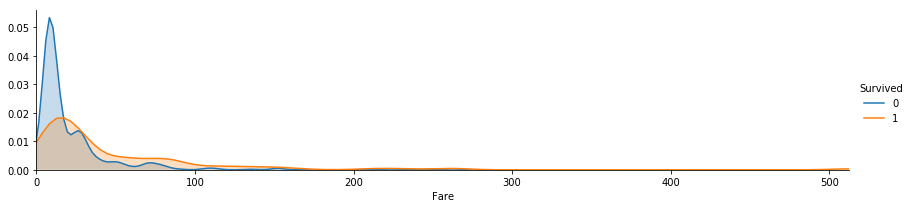

In [224]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0)

In [225]:
for dataset in total_data:
    dataset.loc[ dataset['Fare'] <= 20, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 20) & (dataset['Fare'] <= 50), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 50) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [226]:
train.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,2.0,1,0,A/5 21171,0.0,NaN,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,0.0,NaN,0
3,4,1,1,1,3.0,1,0,113803,2.0,C123,0
4,5,0,3,0,3.0,0,0,373450,0.0,NaN,0
5,6,0,3,0,2.0,0,0,330877,0.0,NaN,2
6,7,0,1,0,5.0,0,0,17463,2.0,E46,0
7,8,0,3,0,0.0,3,1,349909,1.0,NaN,0
8,9,1,3,1,2.0,0,2,347742,0.0,NaN,0
9,10,1,2,1,1.0,1,0,237736,1.0,NaN,1


In [227]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,0,3.0,0,0,330911,0.0,NaN,2
1,893,3,1,4.0,1,0,363272,0.0,NaN,0
2,894,2,0,6.0,0,0,240276,0.0,NaN,2
3,895,3,0,2.0,0,0,315154,0.0,NaN,0
4,896,3,1,2.0,1,1,3101298,0.0,NaN,0


In [228]:
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [229]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,0,2.0,1,0,A/5 21171,0.0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,1
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,0.0,0
3,4,1,1,1,3.0,1,0,113803,2.0,0
4,5,0,3,0,3.0,0,0,373450,0.0,0


In [230]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,0,3.0,0,0,330911,0.0,2
1,893,3,1,4.0,1,0,363272,0.0,0
2,894,2,0,6.0,0,0,240276,0.0,2
3,895,3,0,2.0,0,0,315154,0.0,0
4,896,3,1,2.0,1,1,3101298,0.0,0


In [231]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 11.0)

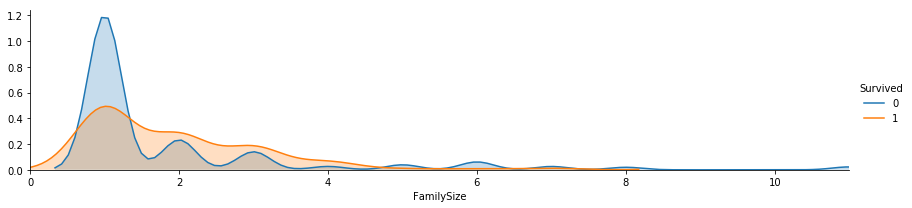

In [232]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [233]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in total_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [234]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,0,2.0,1,0,A/5 21171,0.0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,1,0.4
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,0.0,0,0.0
3,4,1,1,1,3.0,1,0,113803,2.0,0,0.4
4,5,0,3,0,3.0,0,0,373450,0.0,0,0.0


In [235]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,892,3,0,3.0,0,0,330911,0.0,2,0.0
1,893,3,1,4.0,1,0,363272,0.0,0,0.4
2,894,2,0,6.0,0,0,240276,0.0,2,0.0
3,895,3,0,2.0,0,0,315154,0.0,0,0.0
4,896,3,1,2.0,1,1,3101298,0.0,0,0.8


In [236]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [237]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,0,2.0,0.0,0,0.4
1,1,1,1,3.0,2.0,1,0.4
2,1,3,1,2.0,0.0,0,0.0
3,1,1,1,3.0,2.0,0,0.4
4,0,3,0,3.0,0.0,0,0.0


In [238]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,892,3,0,3.0,0.0,2,0.0
1,893,3,1,4.0,0.0,0,0.4
2,894,2,0,6.0,0.0,2,0.0
3,895,3,0,2.0,0.0,0,0.0
4,896,3,1,2.0,0.0,0,0.8


In [239]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [240]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [241]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 6), (891,))

In [242]:
clf = KNeighborsClassifier(n_neighbors = 10)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.83146067 0.78651685 0.79775281 0.85393258 0.84269663
 0.79775281 0.80898876 0.7752809  0.76404494]


In [243]:
round(np.mean(score)*100, 2)

80.7

In [244]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.82022472 0.75280899 0.79775281 0.88764045 0.7752809
 0.78651685 0.79775281 0.75280899 0.78651685]


In [245]:
round(np.mean(score)*100, 2)

79.8

In [246]:
clf = RandomForestClassifier(n_estimators=10)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.80898876 0.76404494 0.80898876 0.85393258 0.78651685
 0.80898876 0.7752809  0.76404494 0.78651685]


In [247]:
round(np.mean(score)*100, 2)

79.68

In [248]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.80898876 0.76404494 0.74157303 0.74157303 0.76404494
 0.75280899 0.80898876 0.84269663 0.80898876]


In [249]:
round(np.mean(score)*100, 2)

78.67

In [250]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

[0.83333333 0.79775281 0.79775281 0.80898876 0.86516854 0.82022472
 0.83146067 0.85393258 0.82022472 0.86516854]


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [251]:
round(np.mean(score)*100,2)

82.94

In [257]:
clf = SVC()
clf.fit(train_data, target)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [258]:
test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [259]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv("C:\\python\\submission.csv")

In [260]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
